In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import pdfplumber
import os 
import subprocess
import numpy as np
from pathlib import Path

%matplotlib inline

In [228]:
data_path = Path("/media/storage/Gender in Children's Literature/")

#### Note: NONA file has NA entries replaced with NO for use with pd.isna() method.

In [229]:
TO_EXCLUDE = ['The Gingerbread Man', 'The Monstrous Tale of Celery Crumble', 'Wiggling Worms At Work']

In [230]:
labels = pd.read_excel(Path(data_path, 'Book List Final NONA.xlsx'), sheet_name='Sheet1', engine='openpyxl')
labels = labels.rename(columns={'Author ': 'Author'})
labels = labels.loc[~labels.Title.isin(TO_EXCLUDE)]

In [231]:
labels = labels[~labels.Title.isna()]

In [232]:
labels

,Number,Title,Author,Author Gender,Cost,Source,Starting Page,Ending Page,Direct Address,Protagonist Gender,Protagonist Human/ Non-human,Protagonist Name,Secondary Character Gender,SC Human/Non Human,SC Names,Notes,Year of First Publication
0,1.0,Seasons,John Burningham,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,This book costs 40/50 pounds to buy and is not...,NaN
1,2.0,Owl Babies,Martin Waddell,M,2.75,ebay,6.0,29.0,N,F/M/M,NH,Sarah/Percy/Bill,F,NH,Owl Mother,NaN,1992.0
2,3.0,Where's My Teddy,Jez Alborough,M,NaN,NaN,6.0,29.0,N,M,H,Eddy,M/NGS/NGS,NH/NH/NH,Freddy; teddy/giant teddy/gigantic bear;the bear,NaN,1992.0
3,4.0,We're Going on a Bear Hunt,Michael Rosen and Helen Oxenbury,M/F,2.79,ebay,5.0,37.0,N,NGS,H,we,NGS,NH,A Bear,NaN,1989.0
4,5.0,Gruff the Grump,Steve Smallman and Cee Biscoe,M/F,3.05,ebay,9.0,30.0,N,M,NH,Mr Bear; Gruff the Grump,F,NH,rabbit,"Pretty gendered - protagonist is male, big, sc...",2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196.0,The Ugly Duckling,Ian Beck,M,2.98,ebay,6.0,34.0,N,M,NH,seventh duckling; sad little duckling; ugly du...,F/F/NGS,NH,mother duck;mother/cat/white birds; the swans,NaN,1997.0
196,197.0,Goldilocks and the Three Bears,Susanna Davidson,F,3.28,ebay,4.0,26.0,N,F,H,Goldilocks,F/M/F/NGS,H/NH/NH/NH,mother/father bear/mother bear/baby bear,NaN,2012.0
198,199.0,Little Red Riding Hood,Mike Gordon,M,2.49,ebay,4.0,25.0,N,F,H,Little Red Riding Hood,F/M/M/F,H/H/NH/H,Mother/Woodcutter/Wolf/grandmother;Granny,NaN,2007.0
199,200.0,Jack and the Beanstalk,Ian Beck,M,NaN,NaN,8.0,23.0,N,M,H,Jack,F/F/M/F/M,NH/H/H/NH/NH,Daisy/mother/old man/goose/giant,NaN,2004.0


#### Let's check out the summary information from the excel spreadsheet:

In [233]:
labels[labels['Protagonist Gender'].isna()]

,Number,Title,Author,Author Gender,Cost,Source,Starting Page,Ending Page,Direct Address,Protagonist Gender,Protagonist Human/ Non-human,Protagonist Name,Secondary Character Gender,SC Human/Non Human,SC Names,Notes,Year of First Publication
0,1.0,Seasons,John Burningham,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,This book costs 40/50 pounds to buy and is not...,NaN
15,16.0,I Love Christmas,Marie Wabbes,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,86.0,Things You Should Know about Bugs,"Author Unknown, Publisher Miles Kelly",NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,184.0,Invisible Isabelle,Wendy Sefcik,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
labels = labels.dropna(subset=['Protagonist Gender'])

In [235]:
len(labels)

194

In [236]:
labels.head()

,Number,Title,Author,Author Gender,Cost,Source,Starting Page,Ending Page,Direct Address,Protagonist Gender,Protagonist Human/ Non-human,Protagonist Name,Secondary Character Gender,SC Human/Non Human,SC Names,Notes,Year of First Publication
1,2.0,Owl Babies,Martin Waddell,M,2.75,ebay,6.0,29.0,N,F/M/M,NH,Sarah/Percy/Bill,F,NH,Owl Mother,NaN,1992.0
2,3.0,Where's My Teddy,Jez Alborough,M,NaN,NaN,6.0,29.0,N,M,H,Eddy,M/NGS/NGS,NH/NH/NH,Freddy; teddy/giant teddy/gigantic bear;the bear,NaN,1992.0
3,4.0,We're Going on a Bear Hunt,Michael Rosen and Helen Oxenbury,M/F,2.79,ebay,5.0,37.0,N,NGS,H,we,NGS,NH,A Bear,NaN,1989.0
4,5.0,Gruff the Grump,Steve Smallman and Cee Biscoe,M/F,3.05,ebay,9.0,30.0,N,M,NH,Mr Bear; Gruff the Grump,F,NH,rabbit,"Pretty gendered - protagonist is male, big, sc...",2009.0
5,6.0,The Owl's Lesson,Nick Butterworth,M,2.24,ebay,4.0,21.0,N,M,H,Percy,M/NGS/M/F,NH,Squirrel/mole/little bird/owl,NaN,1997.0


In [ ]:
labels.loc[:, 'Protagonist Gender'] = labels['Protagonist Gender'].str.strip()

In [238]:
labels['Protagonist Gender'].unique()

array(['F/M/M', 'M', 'NGS', 'M/M', 'NO', 'F', 'M/F', 'F/M', 'NGS/NGS',
       'F/M/M/M'], dtype=object)

#### We now create a character data frame:

In [ ]:
char_data = {
    'name': [],
    'aliases': [],
    'gender': [],
    'book_title': [],
    'author': [],
    'author_gender': [],
    #'protagonist': [],
    'species': [],
    'book_number': [],
    'protagonist_count': [],
    #'secondary_count': []
}

def extract_characters_from_row(row, char_data):    

    gender_list = row['Protagonist Gender'].split('/')
    
    if isinstance(row['Protagonist Name'], str):
        name_list = row['Protagonist Name'].split('/')
    else:
        name_list = [row['Protagonist Name']]
        print("Warning name: ", name_list)

    if isinstance(row['Protagonist Human/ Non-human'], str):            
        species_list = row['Protagonist Human/ Non-human'].split('/')
    else:
        species_list = [row['Protagonist Human/ Non-human']]
        print("Warning species: ", species_list)
        
    if len(name_list) != len(gender_list):
        print("Name and gender lists different lengths! Implementing NGS copy fix.")
#       print(name_list)
#       print(gender_list)
        gender_list = [gender_list[0] for i in name_list]
    
    if len(name_list) != len(species_list):
        print("Name and species lists different lengths! Implementing species copy fix.")
#         print(name_list)
#         print(species_list)
        species_list = [species_list[0] for i in name_list]

    for ni, name in enumerate(name_list):
        if isinstance(name, str) and ';' in name:
            print("Aliased names: ", name)
            primary_name = name.split(';')[0].strip()
            aliases = [alias.strip() for alias in name.split(';')[1:]]
            char_data['name'].append(primary_name)
            char_data['aliases'].append(aliases)
        else:
            char_data['name'].append(name)
            char_data['aliases'].append([])
            
        char_data['gender'].append(gender_list[ni])
        char_data['species'].append(species_list[ni])
        char_data['book_title'].append(row['Title'])
        char_data['author'].append(row['Author'])
        char_data['author_gender'].append(row['Author Gender'])
        char_data['book_number'].append(row['Number'])
        char_data['protagonist_count'].append(len(name_list))
        #char_data['secondary_count'].append(row['Number'])


#print(gender_list)
        #print(name_list)

    
for index, row in labels.iterrows():
#     print(row)
    extract_characters_from_row(row, char_data)

In [240]:
for key in char_data.keys():
    print(key, len(char_data[key]))

name 217
aliases 217
gender 217
book_title 217
author 217
author_gender 217
species 217
book_number 217
protagonist_count 217


In [241]:
characters = pd.DataFrame.from_dict(char_data)

In [242]:
characters

,name,aliases,gender,book_title,author,author_gender,species,book_number,protagonist_count
0,Sarah,[],F,Owl Babies,Martin Waddell,M,NH,2.0,3
1,Percy,[],M,Owl Babies,Martin Waddell,M,NH,2.0,3
2,Bill,[],M,Owl Babies,Martin Waddell,M,NH,2.0,3
3,Eddy,[],M,Where's My Teddy,Jez Alborough,M,H,3.0,1
4,we,[],NGS,We're Going on a Bear Hunt,Michael Rosen and Helen Oxenbury,M/F,H,4.0,1
...,...,...,...,...,...,...,...,...,...
212,Jack,[],M,Jack and the Beanstalk,Ian Beck,M,H,200.0,1
213,mother pig,[],F,The Three Little Pigs,Ian Beck,M,NH,201.0,4
214,first little pig,[pigs],M,The Three Little Pigs,Ian Beck,M,NH,201.0,4
215,second little pig,[pigs],M,The Three Little Pigs,Ian Beck,M,NH,201.0,4


In [243]:
def plot_gender_hist(df, title=None, normalise=False, xlabels=['F', 'M', 'NGS', 'NO']):
    df.gender.value_counts(normalize=normalise).loc[xlabels].plot.bar()

    plt.ylabel('frequency')

    title = 'Protagonist Gender' if title is None else title
    plt.title(title);

In [288]:
characters

,name,aliases,gender,book_title,author,author_gender,species,book_number,protagonist_count
0,Sarah,[],F,Owl Babies,Martin Waddell,M,NH,2.0,3
1,Percy,[],M,Owl Babies,Martin Waddell,M,NH,2.0,3
2,Bill,[],M,Owl Babies,Martin Waddell,M,NH,2.0,3
3,Eddy,[],M,Where's My Teddy,Jez Alborough,M,H,3.0,1
4,we,[],NGS,We're Going on a Bear Hunt,Michael Rosen and Helen Oxenbury,M/F,H,4.0,1
...,...,...,...,...,...,...,...,...,...
212,Jack,[],M,Jack and the Beanstalk,Ian Beck,M,H,200.0,1
213,mother pig,[],F,The Three Little Pigs,Ian Beck,M,NH,201.0,4
214,first little pig,[pigs],M,The Three Little Pigs,Ian Beck,M,NH,201.0,4
215,second little pig,[pigs],M,The Three Little Pigs,Ian Beck,M,NH,201.0,4


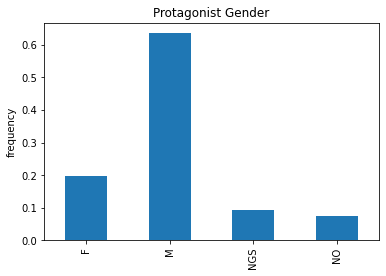

In [289]:
plot_gender_hist(characters, normalise=True)

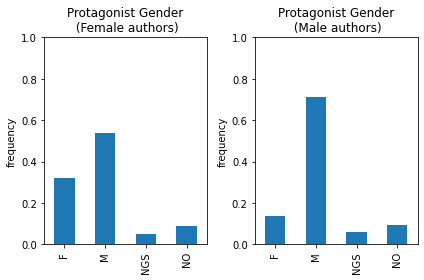

In [290]:
plt.subplot(1,2,1)
plot_gender_hist(characters[characters.author_gender=='F'], normalise=True, title='Protagonist Gender\n (Female authors)')
plt.ylim([0,1])
plt.subplot(1,2,2)
plot_gender_hist(characters[characters.author_gender=='M'], normalise=True, title='Protagonist Gender\n (Male authors)')
plt.ylim([0,1])
plt.tight_layout()

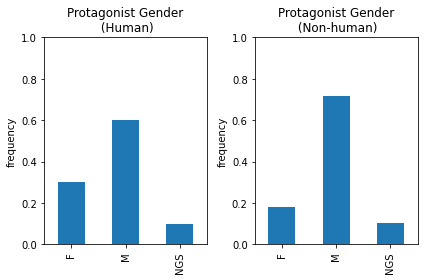

In [291]:
plt.subplot(1,2,1)
plot_gender_hist(characters[characters.species=='H'], normalise=True, title='Protagonist Gender\n (Human)', xlabels=['F', 'M', 'NGS'])
plt.ylim([0,1])
plt.subplot(1,2,2)
plot_gender_hist(characters[characters.species=='NH'], normalise=True, title='Protagonist Gender\n (Non-human)', xlabels=['F', 'M', 'NGS'])
plt.ylim([0,1])
plt.tight_layout()

In [247]:
characters[characters.gender=='NO']

,name,aliases,gender,book_title,author,author_gender,species,book_number,protagonist_count
15,NaN,[],NO,All Year Round,Sally Hewit,F,NaN,14.0,1
27,NaN,[],NO,Ten in the Bed and Other Counting Rhymes,Zita Newcome,F,NaN,26.0,1
28,NaN,[],NO,Ten Tall Giraffes,Brian Moses,M,NaN,27.0,1
70,NaN,[],NO,You Choose,Nick Sharratt and Pippa Goodheart,F/M,NaN,67.0,1
97,NaN,[],NO,Mini Beasties,Michael Rosen,M,NaN,92.0,1
115,I,[],NO,The Tree That's Meant To Be,Yuval Zommer,M,NH,108.0,1
125,NaN,[],NO,You Can't Take An Elephant On The Bus,Patricia Cleveland-Peck,F,NaN,115.0,1
126,NaN,[],NO,These Are Animals,Daniel Egnéus,M,NaN,116.0,1
132,NaN,[],NO,The Animal Boogie,Debbie Harter,F,NaN,122.0,1
139,NaN,[],NO,There's A Monster In Your Book,Tom Fletcher,M,H,129.0,1


In [248]:
def count_table(df, column):
    return (
        df.groupby(column)
        .agg({'book_title':'count'})
        .rename(columns={'book_title':'count'})
        .sort_values(by='count', ascending=False)
    )

In [249]:
count_table(characters, 'gender')
#count_table(labels.loc[labels['Protagonist Human/ Non-human'] == 'NH'], 'Protagonist Gender')
#count_table(labels, 'Protagonist Human/ Non-human')

,count
gender,
M,138
F,43
NGS,20
NO,16


### We now look at secondary characters...

In [250]:
labels['Secondary Character Gender'].unique()

array(['F', 'M/NGS/NGS', 'NGS', 'M/NGS/M/F', 'M ', 'M/NGS', 'M/F/NGS',
       'M', 'NGS/NGS/NGS/NGS/NGS/NGS/M/M', 'NGS/M/NGS/NGS/NGS/NGS', nan,
       'M/M/M/F/NGS/NGS', 'NGS/M/F', 'M/M/M/NGS', 'M/M/M/M/M/M/M',
       'F/M/NGS/NGS/NGS/NGS/NGS/NGS/NGS/NGS/NGS', 'M/F/M/M/M/NGS',
       'NGS/NGS/M/NGS/F/M', 'M/F/M/M/M/M/M',
       'NGS/F/F/F/NGS/M/NGS/NGS/NGS/NGS/M/NGS/NGS/NGS/NGS/NGS/NGS/NGS/M/M/NGS/NGS/NGS/M/M/M/M/M/M/M/F/M/M/NGS/M/NGS',
       'NGS/NGS/NGS/NGS/NGS/NGS/NGS/NGS', 'NGS/M/NGS', 'M/M/M ',
       'M/NGS/NGS/NGS', 'M/F/M/NGS/NGS', 'NGS/NGS/NGS ', 'M/M/F/NGS/NGS',
       'F/F/M/F/NGS', 'F/M/F/F/M/M/F/M ', 'M/F/F/NGS/NGS/M/F', 'F/F/F/M',
       'F/M/F/NGS/NGS/NGS/NGS/NGS/M/F', 'F/F/F/M/M/M/NGS/NGS/NGS/NGS',
       'F/F/F/M/NGS/NGS/NGS/NGS/NGS/NGS',
       'F/F/F/F/M/NGS/NGS/NGS/NGS/NGS/M',
       'F/F/F/M/NGS/NGS/NGS/NGS/NGS/NGS/M/NGS/NGS', 'F/F/F/M/NGS/F/M',
       'F/F/M/M/F/M/NGS/NGS/NGS/NGS/NGS/NGS',
       'F/NGS/NGS/NGS/NGS/NGS/NGS/NGS/M',
       'F/NGS/NGS/F/NGS/NGS/NGS/

#### We now create a character data frame:

In [251]:
labels.head()

,Number,Title,Author,Author Gender,Cost,Source,Starting Page,Ending Page,Direct Address,Protagonist Gender,Protagonist Human/ Non-human,Protagonist Name,Secondary Character Gender,SC Human/Non Human,SC Names,Notes,Year of First Publication
1,2.0,Owl Babies,Martin Waddell,M,2.75,ebay,6.0,29.0,N,F/M/M,NH,Sarah/Percy/Bill,F,NH,Owl Mother,NaN,1992.0
2,3.0,Where's My Teddy,Jez Alborough,M,NaN,NaN,6.0,29.0,N,M,H,Eddy,M/NGS/NGS,NH/NH/NH,Freddy; teddy/giant teddy/gigantic bear;the bear,NaN,1992.0
3,4.0,We're Going on a Bear Hunt,Michael Rosen and Helen Oxenbury,M/F,2.79,ebay,5.0,37.0,N,NGS,H,we,NGS,NH,A Bear,NaN,1989.0
4,5.0,Gruff the Grump,Steve Smallman and Cee Biscoe,M/F,3.05,ebay,9.0,30.0,N,M,NH,Mr Bear; Gruff the Grump,F,NH,rabbit,"Pretty gendered - protagonist is male, big, sc...",2009.0
5,6.0,The Owl's Lesson,Nick Butterworth,M,2.24,ebay,4.0,21.0,N,M,H,Percy,M/NGS/M/F,NH,Squirrel/mole/little bird/owl,NaN,1997.0


In [276]:
char_data = {
    'name': [],
    'aliases': [],
    'gender': [],
    'book_title': [],
    'author': [],
    'author_gender': [],
    #'protagonist': [],
    'species': [],
    'book_number': [],
    'secondary_count': [],
    #'secondary_count': []
}

def extract_characters_from_row(row, char_data):    
    
    if isinstance(row['Secondary Character Gender'], str):
        gender_list = row['Secondary Character Gender'].split('/')
    else:
        gender_list = [row['Secondary Character Gender']]
        print("Warning gender: ", gender_list)
    
    
    if isinstance(row['SC Names'], str):
        name_list = row['SC Names'].split('/')
    else:
        name_list = [row['SC Names']]
        print("Warning name: ", name_list)

    if isinstance(row['SC Human/Non Human'], str):            
        species_list = row['SC Human/Non Human'].split('/')
    else:
        species_list = [row['SC Human/Non Human']]
        print("Warning species: ", species_list)
        
    if len(name_list) != len(gender_list):
        print("Name and gender lists different lengths! Implementing NGS copy fix.")
        if len(gender_list)!=1:
            print(name_list)
            print(gender_list)
        gender_list = [gender_list[0] for i in name_list]
    
    if len(name_list) != len(species_list):
        print("Name and species lists different lengths! Implementing species copy fix.")
        if len(species_list)!=1:
            print(name_list)
            print(species_list)
        species_list = [species_list[0] for i in name_list]

    for ni, name in enumerate(name_list):
        if isinstance(name, str) and ';' in name:
            print("Aliased names: ", name)
            primary_name = name.split(';')[0].strip()
            aliases = [alias.strip() for alias in name.split(';')[1:]]
            char_data['name'].append(primary_name)
            char_data['aliases'].append(aliases)
        else:
            char_data['name'].append(name)
            char_data['aliases'].append([])
            
        gender = gender_list[ni].strip() if isinstance(gender_list[ni], str) else gender_list[ni]
        if gender not in ['M', 'F', 'NGS', np.nan]:
            print("GENDERS WRONG ", row['Title'], gender)
            
        char_data['gender'].append(gender)
        char_data['species'].append(species_list[ni])
        char_data['book_title'].append(row['Title'])
        char_data['author'].append(row['Author'])
        char_data['author_gender'].append(row['Author Gender'])
        char_data['book_number'].append(row['Number'])
        char_data['secondary_count'].append(len(name_list))
        #char_data['secondary_count'].append(row['Number'])


#print(gender_list)
        #print(name_list)

    
for index, row in labels.iterrows():
#     print(row)
    extract_characters_from_row(row, char_data)

Aliased names:  Freddy; teddy
Aliased names:  gigantic bear;the bear
Name and species lists different lengths! Implementing species copy fix.
Aliased names:  fox; Mr ghost
Name and species lists different lengths! Implementing species copy fix.
Aliased names:  mice;mouse
Name and species lists different lengths! Implementing species copy fix.
Aliased names:  two brothers;his brother;two rabbits
Aliased names:  little sister;smallest rabbit;little rabbit
Name and species lists different lengths! Implementing species copy fix.
Name and species lists different lengths! Implementing species copy fix.
Warning gender:  [nan]
Warning name:  [nan]
Warning species:  [nan]
Warning gender:  [nan]
Warning name:  [nan]
Warning species:  [nan]
Name and species lists different lengths! Implementing species copy fix.
Aliased names:  pup;puppy
Name and species lists different lengths! Implementing species copy fix.
Name and species lists different lengths! Implementing species copy fix.
Name and specie

In [277]:
secondary_characters = pd.DataFrame.from_dict(char_data)

In [292]:
secondary_characters

,name,aliases,gender,book_title,author,author_gender,species,book_number,secondary_count
0,Owl Mother,[],F,Owl Babies,Martin Waddell,M,NH,2.0,1
1,Freddy,[teddy],M,Where's My Teddy,Jez Alborough,M,NH,3.0,3
2,giant teddy,[],NGS,Where's My Teddy,Jez Alborough,M,NH,3.0,3
3,gigantic bear,[the bear],NGS,Where's My Teddy,Jez Alborough,M,NH,3.0,3
4,A Bear,[],NGS,We're Going on a Bear Hunt,Michael Rosen and Helen Oxenbury,M/F,NH,4.0,1
...,...,...,...,...,...,...,...,...,...
1277,mother,[],F,Jack and the Beanstalk,Ian Beck,M,H,200.0,5
1278,old man,[],M,Jack and the Beanstalk,Ian Beck,M,H,200.0,5
1279,goose,[],F,Jack and the Beanstalk,Ian Beck,M,NH,200.0,5
1280,giant,[],M,Jack and the Beanstalk,Ian Beck,M,NH,200.0,5


In [279]:
ct = count_table(secondary_characters, 'gender')
#count_table(labels.loc[labels['Protagonist Human/ Non-human'] == 'NH'], 'Protagonist Gender')
#count_table(labels, 'Protagonist Human/ Non-human')

In [280]:
ct

,count
gender,
NGS,578
M,389
F,291
NH,15
H,1


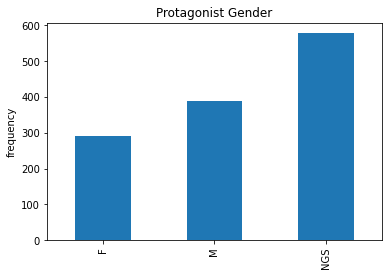

In [307]:
plot_gender_hist(secondary_characters, normalise=False, xlabels=['F', 'M', 'NGS'])

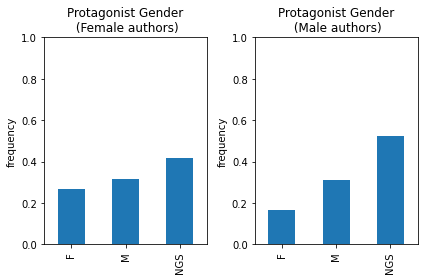

In [294]:
plt.subplot(1,2,1)
plot_gender_hist(secondary_characters[secondary_characters.author_gender=='F'], normalise=True, title='Protagonist Gender\n (Female authors)', xlabels=['F', 'M', 'NGS'])
plt.ylim([0,1])
plt.subplot(1,2,2)
plot_gender_hist(secondary_characters[secondary_characters.author_gender=='M'], normalise=True, title='Protagonist Gender\n (Male authors)', xlabels=['F', 'M', 'NGS'])
plt.ylim([0,1])
plt.tight_layout()

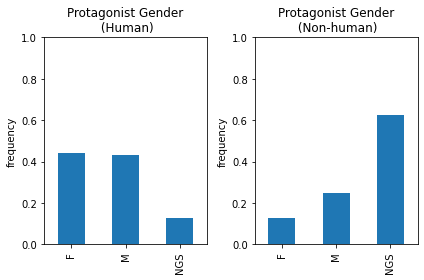

In [295]:
plt.subplot(1,2,1)
plot_gender_hist(secondary_characters[secondary_characters.species=='H'], normalise=True, title='Protagonist Gender\n (Human)', xlabels=['F', 'M', 'NGS'])
plt.ylim([0,1])
plt.subplot(1,2,2)
plot_gender_hist(secondary_characters[secondary_characters.species=='NH'], normalise=True, title='Protagonist Gender\n (Non-human)', xlabels=['F', 'M', 'NGS'])
plt.ylim([0,1])
plt.tight_layout()

In [300]:
secondary_characters

,name,aliases,gender,book_title,author,author_gender,species,book_number,secondary_count
0,Owl Mother,[],F,Owl Babies,Martin Waddell,M,NH,2.0,1
1,Freddy,[teddy],M,Where's My Teddy,Jez Alborough,M,NH,3.0,3
2,giant teddy,[],NGS,Where's My Teddy,Jez Alborough,M,NH,3.0,3
3,gigantic bear,[the bear],NGS,Where's My Teddy,Jez Alborough,M,NH,3.0,3
4,A Bear,[],NGS,We're Going on a Bear Hunt,Michael Rosen and Helen Oxenbury,M/F,NH,4.0,1
...,...,...,...,...,...,...,...,...,...
1277,mother,[],F,Jack and the Beanstalk,Ian Beck,M,H,200.0,5
1278,old man,[],M,Jack and the Beanstalk,Ian Beck,M,H,200.0,5
1279,goose,[],F,Jack and the Beanstalk,Ian Beck,M,NH,200.0,5
1280,giant,[],M,Jack and the Beanstalk,Ian Beck,M,NH,200.0,5


In [315]:
temp = secondary_characters
temp = temp[~temp.name.isna()]

In [316]:
temp['name'] = [n.lower()  for n in temp.name]

/home/expert/Documents/work/saw/Gender-in-Primary-School/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [317]:
temp['name'] = [n if 'mother' not in n else 'mum' for n in temp.name]

/home/expert/Documents/work/saw/Gender-in-Primary-School/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [318]:
temp['name'] = [n if 'mummy' not in n else 'mum' for n in temp.name]

/home/expert/Documents/work/saw/Gender-in-Primary-School/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [327]:

temp.groupby('name').agg({'gender':'count'}).rename(columns={'gender':'count'}).sort_values(by='count', ascending=False).head(20)
# .rename(columns={'book_title':'count'})
# .sort_values(by='count', ascending=False)

,count
name,
mum,55
dad,32
fox,12
owl,12
monkey,11
tiger,11
birds,11
bear,11
bird,10


In [326]:
temp['name'] = [n if 'daddy' not in n else 'dad' for n in temp.name]
temp['name'] = [n if 'father' not in n else 'dad' for n in temp.name]

/home/expert/Documents/work/saw/Gender-in-Primary-School/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/expert/Documents/work/saw/Gender-in-Primary-School/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [324]:
55 / sum(temp.gender=='F')

0.18900343642611683

In [328]:
32 / sum(temp.gender=='M')

0.08226221079691516